This notebook is imported from my google colab
    link : https://colab.research.google.com/drive/1gkHPc7TkqpLdNnA0rhQuxeDVanhtt8tF?usp=sharing


In [1]:
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = "thusharadilshan" # username from the json file
os.environ['KAGGLE_KEY'] = "66c089f784240026499f124e33aa8277" # key from the json file

In [3]:
!kaggle datasets download -d landlord/handwriting-recognition

100% 1.26G/1.26G [00:15<00:00, 66.7MB/s]
100% 1.26G/1.26G [00:15<00:00, 85.0MB/s]


In [4]:
!kaggle datasets download -d vaibhao/handwritten-characters

100% 1.61G/1.62G [00:13<00:00, 197MB/s]
100% 1.62G/1.62G [00:14<00:00, 119MB/s]


In [5]:
! unzip handwriting-recognition.zip -d handwriting-recognition

Streaming output truncated to the last 5000 lines.
  inflating: handwriting-recognition/validation_v2/validation/VALIDATION_5003.jpg  
  inflating: handwriting-recognition/validation_v2/validation/VALIDATION_5004.jpg  
  inflating: handwriting-recognition/validation_v2/validation/VALIDATION_5005.jpg  
  inflating: handwriting-recognition/validation_v2/validation/VALIDATION_5006.jpg  
  inflating: handwriting-recognition/validation_v2/validation/VALIDATION_5007.jpg  
  inflating: handwriting-recognition/validation_v2/validation/VALIDATION_5008.jpg  
  inflating: handwriting-recognition/validation_v2/validation/VALIDATION_5009.jpg  
  inflating: handwriting-recognition/validation_v2/validation/VALIDATION_5010.jpg  
  inflating: handwriting-recognition/validation_v2/validation/VALIDATION_5011.jpg  
  inflating: handwriting-recognition/validation_v2/validation/VALIDATION_5012.jpg  
  inflating: handwriting-recognition/validation_v2/validation/VALIDATION_5013.jpg  
  inflating: handwriting-

In [6]:
! unzip handwritten-characters.zip -d handwritten-characters

Streaming output truncated to the last 5000 lines.
  inflating: handwritten-characters/dataset/Validation/F/167.jpg  
  inflating: handwritten-characters/dataset/Validation/F/168.jpg  
  inflating: handwritten-characters/dataset/Validation/F/169.jpg  
  inflating: handwritten-characters/dataset/Validation/F/17.jpg  
  inflating: handwritten-characters/dataset/Validation/F/170.jpg  
  inflating: handwritten-characters/dataset/Validation/F/171.jpg  
  inflating: handwritten-characters/dataset/Validation/F/172.jpg  
  inflating: handwritten-characters/dataset/Validation/F/173.jpg  
  inflating: handwritten-characters/dataset/Validation/F/174.jpg  
  inflating: handwritten-characters/dataset/Validation/F/175.jpg  
  inflating: handwritten-characters/dataset/Validation/F/176.jpg  
  inflating: handwritten-characters/dataset/Validation/F/177.jpg  
  inflating: handwritten-characters/dataset/Validation/F/178.jpg  
  inflating: handwritten-characters/dataset/Validation/F/179.jpg  
  inflating:

In [8]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=712d235c4fe7a56d64b41dc278ed07e11effa719417dc97523f983df5506af05
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [9]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
import np_utils
from keras.models import Sequential
from keras import optimizers
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [10]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.1
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.19.1
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.3
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.7
cufflinks==0.17.3
cupy-cuda12x==12.2.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
c

In [11]:
dir = "/content/handwritten-characters/Train"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [12]:
len(train_data)

140000

In [14]:
val_dir = "/content/handwritten-characters/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [15]:
len(val_data)

15209

In [16]:
random.shuffle(train_data)
random.shuffle(val_data)

In [17]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [18]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [19]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [20]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [21]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [22]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [23]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [24]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [26]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [27]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
4375/4375 [==============================] - 31s 5ms/step - loss: 0.6064 - accuracy: 0.8062 - val_loss: 0.2972 - val_accuracy: 0.9008
Epoch 2/50
4375/4375 [==============================] - 22s 5ms/step - loss: 0.3452 - accuracy: 0.8832 - val_loss: 0.2836 - val_accuracy: 0.8972
Epoch 3/50
4375/4375 [==============================] - 22s 5ms/step - loss: 0.3011 - accuracy: 0.8975 - val_loss: 0.2338 - val_accuracy: 0.9223
Epoch 4/50
4375/4375 [==============================] - 22s 5ms/step - loss: 0.2778 - accuracy: 0.9043 - val_loss: 0.2527 - val_accuracy: 0.9092
Epoch 5/50
4375/4375 [==============================] - 22s 5ms/step - loss: 0.2600 - accuracy: 0.9098 - val_loss: 0.2518 - val_accuracy: 0.9073
Epoch 6/50
4375/4375 [==============================] - 24s 5ms/step - loss: 0.2480 - accuracy: 0.9134 - val_loss: 0.2428 - val_accuracy: 0.9079
Epoch 7/50
4375/4375 [==============================] - 25s 6ms/step - loss: 0.2385 - accuracy: 0.9158 - val_loss: 0.2521 - val_ac

In [28]:
model.save('/content/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


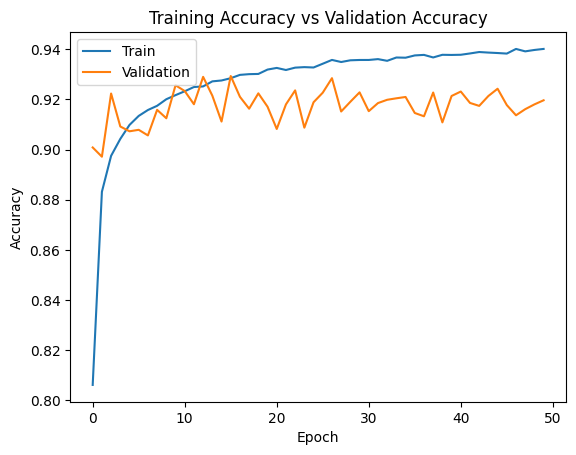

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

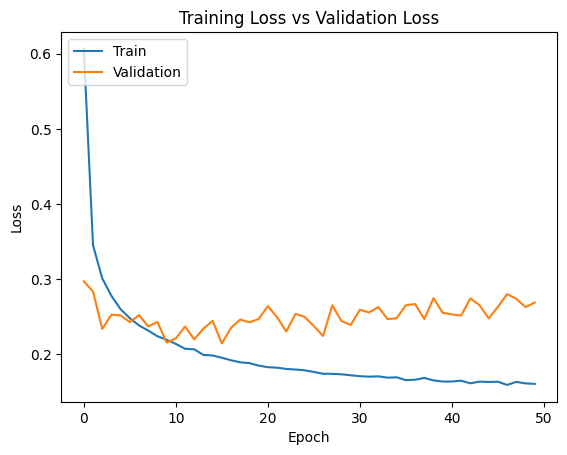

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [106]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="top-to-bottom")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            # x-=5
            # y-=5
            # w+=10
            # h+=10
            # cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        print(np.argmax(ypred))
        ypred = np.argmax(ypred)
        ypred = str(ypred)
        # [x] = ypred
        letters.append(ypred)
    return letters, image

# plt.imshow(image)

In [73]:
def get_word(letter):
    word = "".join(letter)
    return word

1/1 [==============================] - 0s 47ms/step
BIWF5


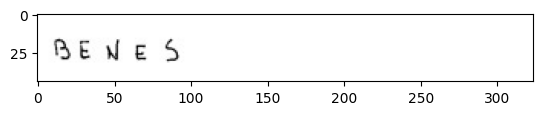

In [74]:
letter,image = get_letters("/content/handwriting-recognition/train_v2/train/TRAIN_00003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 18ms/step
10
1/1 [==============================] - 0s 17ms/step
17
1/1 [==============================] - 0s 17ms/step
29
1/1 [==============================] - 0s 16ms/step
29
1/1 [==============================] - 0s 20ms/step
15
1017292915


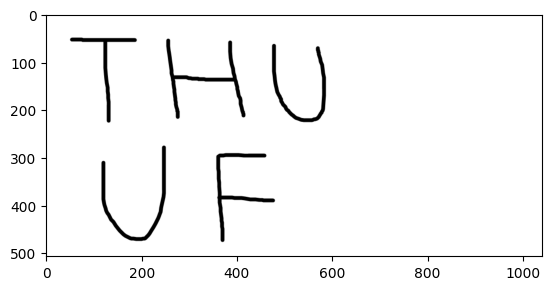

In [108]:
letter,image = get_letters("A.png")
word = get_word(letter)
print(word)
plt.imshow(image)

In [95]:
!cp  /content/handwriting-recognition.zip /content/drive/MyDrive/Datasets

In [96]:
!cp /content/handwritten-characters.zip /content/drive/MyDrive/Datasets

In [97]:
!cp /content/model.h5 /content/drive/MyDrive/Datasets/

In [87]:
print(LB.classes_)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
